In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_wine

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

# load data

In [7]:
wine = load_wine()

In [8]:
X = wine['data']
y = wine['target']

In [9]:
X.shape

(178, 13)

In [10]:
y.shape

(178,)

In [11]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# EDA 

## mean

In [12]:
np.mean(X, axis=0)

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

## standard deviation

In [13]:
np.std(X, axis=0)

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

## quantile

In [14]:
np.quantile(X, [.25, .5, .75], axis=0, keepdims=True)

array([[[1.23625e+01, 1.60250e+00, 2.21000e+00, 1.72000e+01,
         8.80000e+01, 1.74250e+00, 1.20500e+00, 2.70000e-01,
         1.25000e+00, 3.22000e+00, 7.82500e-01, 1.93750e+00,
         5.00500e+02]],

       [[1.30500e+01, 1.86500e+00, 2.36000e+00, 1.95000e+01,
         9.80000e+01, 2.35500e+00, 2.13500e+00, 3.40000e-01,
         1.55500e+00, 4.69000e+00, 9.65000e-01, 2.78000e+00,
         6.73500e+02]],

       [[1.36775e+01, 3.08250e+00, 2.55750e+00, 2.15000e+01,
         1.07000e+02, 2.80000e+00, 2.87500e+00, 4.37500e-01,
         1.95000e+00, 6.20000e+00, 1.12000e+00, 3.17000e+00,
         9.85000e+02]]])

## min, max

In [15]:
np.min(X, axis=0)

array([1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01, 9.800e-01,
       3.400e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01, 1.270e+00,
       2.780e+02])

In [16]:
np.max(X, axis=0)

array([1.483e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
       5.080e+00, 6.600e-01, 3.580e+00, 1.300e+01, 1.710e+00, 4.000e+00,
       1.680e+03])

## distribution

In [17]:
feature_names = wine['feature_names']

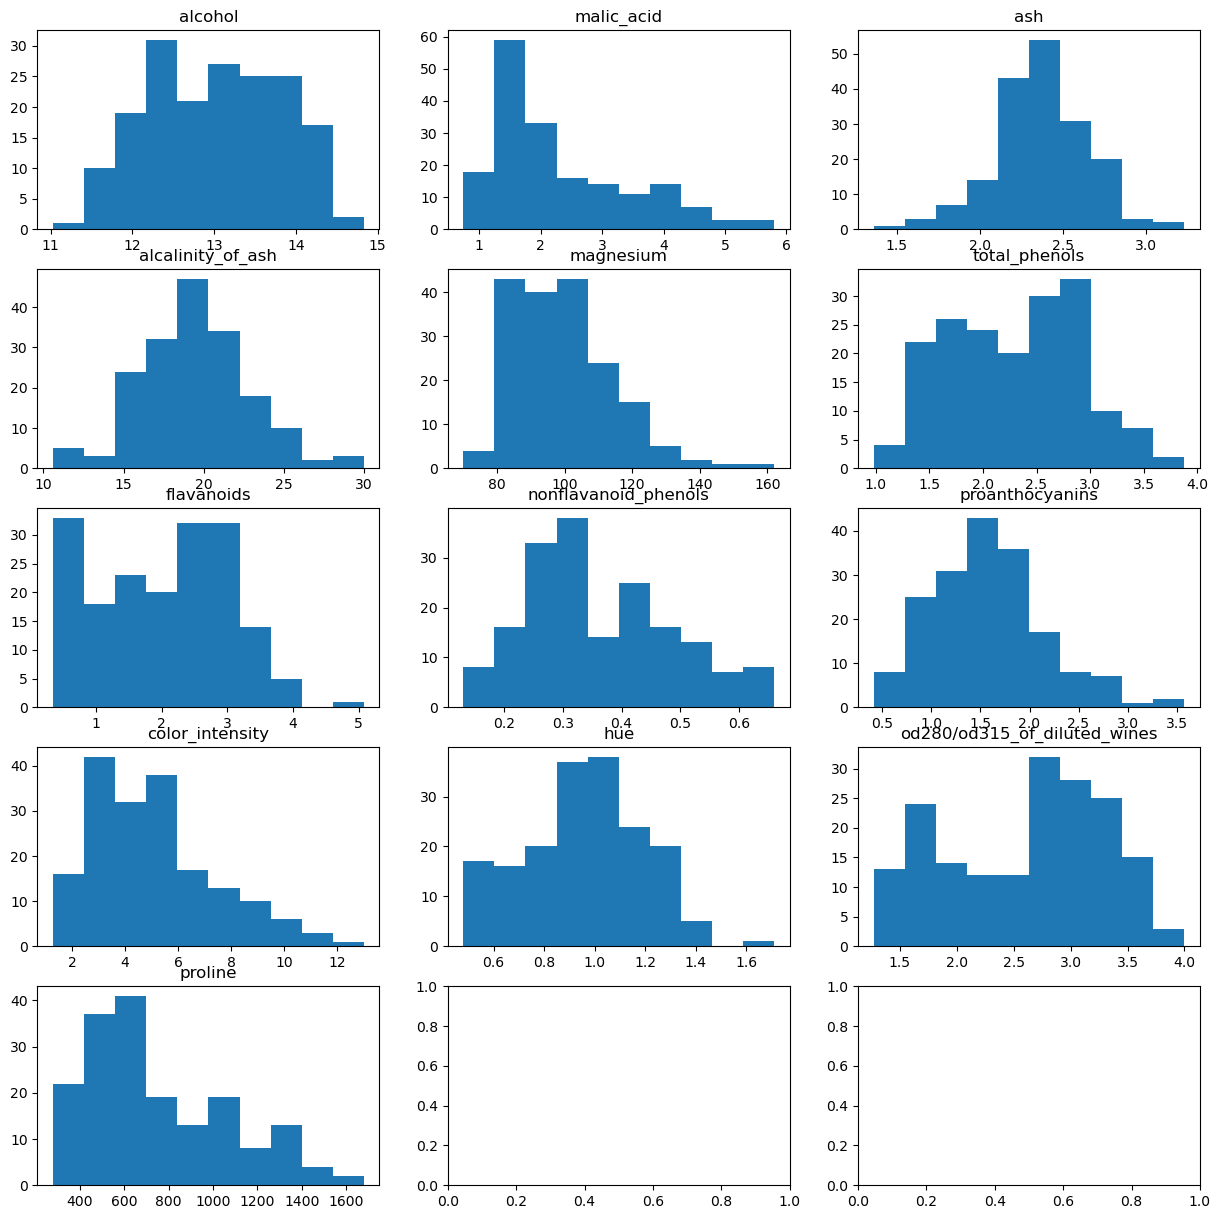

In [18]:
fig, ax = plt.subplots(int(np.ceil(X.shape[1] / 3)), 3, figsize=(15, 15))
for i in np.arange(X.shape[1]):
    ax[i// 3, i% 3].hist(X[:, i])
    ax[i// 3, i% 3].set_title(feature_names[i])

## kiểm tra outlier bằng boxplot

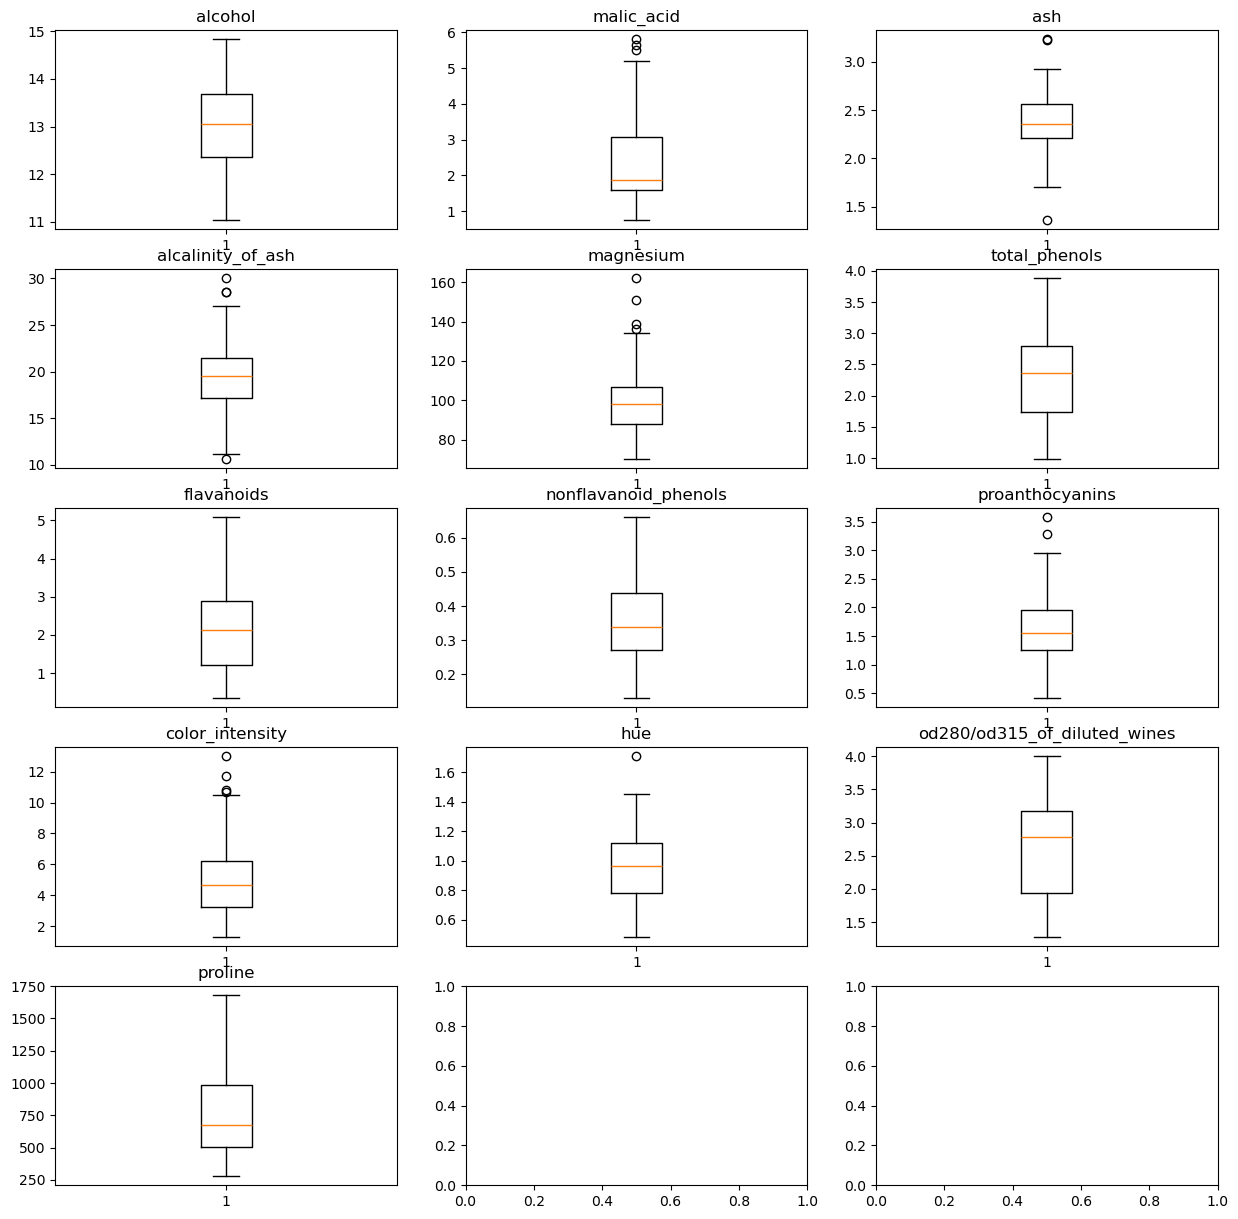

In [19]:
fig, ax = plt.subplots(int(np.ceil(X.shape[1] / 3)), 3, figsize=(15, 15))
for i in np.arange(X.shape[1]):
    ax[i// 3, i% 3].boxplot(X[:, i])
    ax[i// 3, i% 3].set_title(feature_names[i])

## Phân tích tương quan

In [20]:
X.shape

(178, 13)

In [21]:
correlation_matrix = np.corrcoef(X, rowvar=False)

In [22]:
pd.DataFrame(correlation_matrix, columns=feature_names, index=feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## phân tích tập trung - Concentration analysis
- đối với những tập dữ liệu có thể chia thành các nhóm

# modeling

## train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    stratify=y)

In [25]:
np.bincount(y_train)

array([41, 50, 33], dtype=int64)

In [26]:
np.bincount(y)

array([59, 71, 48], dtype=int64)

In [27]:
np.bincount(y_test)

array([18, 21, 15], dtype=int64)

## standardizaion

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
X_train_std = sc.fit_transform(X_train)

In [31]:
X_test_std = sc.transform(X_test)

In [32]:
np.mean(X_test_std)

0.02809416624198365

In [33]:
np.std(X_test_std)

0.9941456593108073

## fitting

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')

In [36]:
lr.fit(X_train_std, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

# validation

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_predict = lr.predict(X_test_std)

In [39]:
accuracy_score(y_test, y_predict)

0.9629629629629629

In [41]:
lr.intercept_

array([-1.41372295, -1.52217975, -2.09331157])

In [42]:
lr.coef_

array([[ 1.49740515,  0.03205043,  0.58529879, -0.54576065,  0.        ,
         0.        ,  0.59223497,  0.        ,  0.        ,  0.        ,
         0.        ,  1.4295262 ,  2.32555189],
       [-1.51996982, -0.43519546, -0.7364517 ,  0.        ,  0.        ,
         0.37318057,  0.3263453 ,  0.01601584,  0.        , -2.25648382,
         0.64126876,  0.        , -2.13418777],
       [ 0.        ,  0.39097194,  0.        ,  0.34827616,  0.        ,
         0.        , -1.52726761,  0.        ,  0.        ,  1.97605866,
        -0.37980999, -1.54176702,  0.        ]])

# visualization

In [70]:
weights = list()
params = list()
for c in np.arange(-4, 6):
    lr = LogisticRegression(
        penalty='l1',
        C = 10.**c,
        multi_class = 'ovr',
        solver = 'liblinear',
        random_state = 0
    )
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
params = np.array(params)

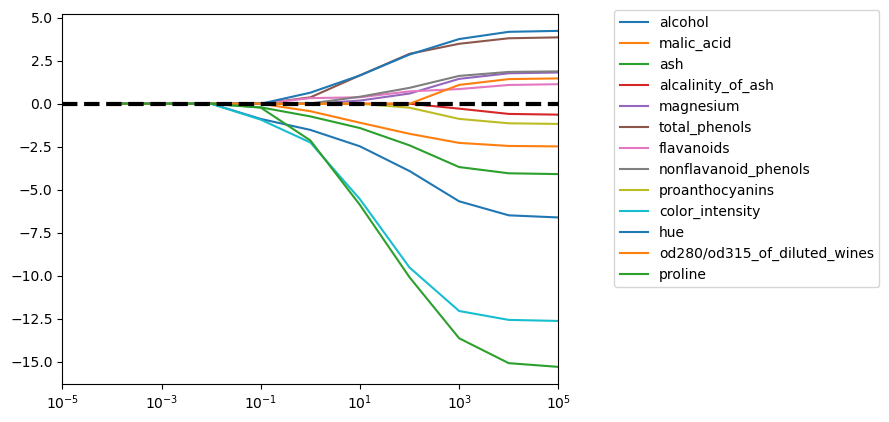

In [106]:
feature_names = wine['feature_names']
ax = plt.subplot(111)
for column in range(weights.shape[1]):
    plt.plot(params, weights[:, column],
            label=feature_names[column])
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xscale('log')
plt.legend(loc='upper center', 
         bbox_to_anchor=(1.38, 1.03))
plt.show()

=> * c càng nhỏ thì \lambda càng lớn *
- mà lambda càng lớn thì thuật toán lại ưu tiên minimize regularization hơn hàm loss chính => weight ~ 0

# Feature Redution

## feature selection: 
- Greedy Search Algorithms
  + Thuật toán này đưa ra quyết định dựa trên cái có vẻ tốt nhất vào thời điểm đó, mà không xem xét đến các hậu quả xa hơn. Nó chọn lựa chọn có vẻ tốt nhất ngay lúc đó, mà không suy nghĩ về cách nó có thể ảnh hưởng đến các quyết định sau này. Điều này thường dẫn đến một giải pháp có thể không phải là tốt nhất cuối cùng, nhưng đủ tốt và thường nhanh hơn để tìm ra.
- Exhaustive Search Alogorithms
  + Đây giống như việc kiểm tra mọi kết hợp có thể để tìm ra giải pháp tốt nhất. Nó khám phá mọi tùy chọn một cách có hệ thống, đảm bảo rằng họ sẽ tìm ra giải pháp tốt nhất nếu có. Tuy nhiên, phương pháp này có thể tốn rất nhiều thời gian và tài nguyên tính toán, đặc biệt là đối với các vấn đề phức tạp với nhiều sự lựa chọn có thể.

**Sequential Backward Selection (SBS) - a Greedy Search Algorithm**
1. Initialize the algorithm with k = d, where d is the dimensionality of the full feature space, Xd.
2. Determine the feature, x–, that maximizes the criterion: x– = argmax J(Xk – x..
3. Remove the feature, x–, from the feature set: Xk–1 = Xk – x–; k = k – 1.
4. Terminate if k equals the number of desired features; otherwise, go to step 2

In [108]:
from itertools import combinations

In [112]:
from sklearn.metrics import accuracy_score

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.base import clone

In [139]:
class SBS:
    def __init__(self,
                 k_features,
                 estimator,
                 test_size,
                 random_state=1,
                 scoring=accuracy_score,
                ):
        self.k_features = k_features
        self.estimator = clone(estimator)
        self.test_size = test_size
        self.random_state = random_state
        self.scoring = accuracy_score
        
    def fit(self, X, y):
        # chia train test
        X_train, X_test, y_train, y_test =\
        train_test_split(
            X, y,
            test_size=self.test_size,
            stratify=y,
            random_state=1
        )
        # khởi tạo giải thuật với k = d
        dim = X_train.shape[1]        
        self.indices_ = list(range(dim))
        self.subsets_ = [self.indices_]
        score = self.calculate_score_(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        # lap cho den khi dung kich co
        while dim > self.k_features:
            scores = list()
            subsets = list()
            for p in combinations(self.indices_, r=dim-1):
                score = self.calculate_score_(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best])
            
            dim -= 1
        return self
        
    def calculate_score_(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_predict = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_predict)
        return score

In [140]:
random_state=1
estimator = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    random_state=random_state
)

In [141]:
sbs = SBS(k_features = 5,
          test_size=0.3,
         estimator=estimator,
         )

In [142]:
sbs.fit(X_train_std, y_train)

In [ ]:
# kneightbor

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier(n_neighbors=5)

In [150]:
sbs = SBS(k_features = 1,
          test_size = 0.3,
          estimator = knn)

In [151]:
sbs.fit(X_train_std, y_train)

In [154]:
sbs.subsets_

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 8, 10, 11, 12),
 (0, 1, 2, 3, 8, 10, 11, 12),
 (0, 1, 2, 3, 10, 11, 12),
 (0, 1, 3, 10, 11, 12),
 (0, 1, 10, 11, 12),
 (0, 1, 11, 12),
 (0, 1, 11),
 (0, 11),
 (11,)]

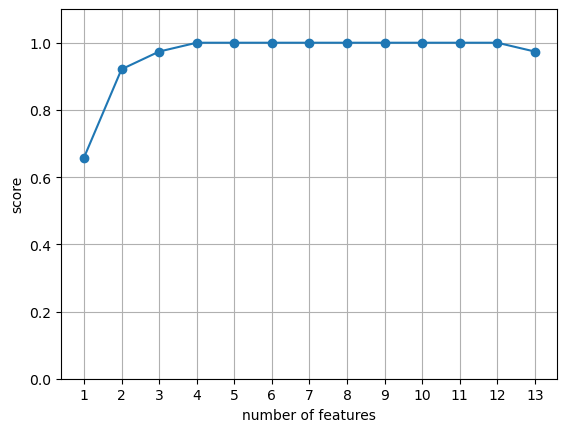

In [159]:
k_features = [len(k) for k in sbs.subsets_]
plt.plot(k_features, sbs.scores_, marker='o')
plt.xlabel('number of features')
plt.ylabel('score')
plt.xticks(list(range(1, 14)))
plt.ylim([0, 1.1])
plt.grid()
plt.show()

In [164]:
k_features

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [178]:
k3 = list(sbs.subsets_[10])

In [ ]:
# all features

In [182]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [184]:
y_predict = knn.predict(X_test_std)
accuracy_score(y_test, y_predict)

0.9444444444444444

In [185]:
# 3 features

In [188]:
knn.fit(X_train_std[:, k3], y_train)

KNeighborsClassifier()

In [189]:
y_predict = knn.predict(X_test_std[:, k3])
accuracy_score(y_test, y_predict)

0.8703703703703703

In [190]:
y_predict = knn.predict(X_train_std[:, k3])
accuracy_score(y_train, y_predict)

0.967741935483871

**Assessing feature importance with random forests**
- Sử dụng random forests chúng ta có thể đon lường tầm quan trọng của đặc điểm khi mức giảm tạp chất trung bình được tính toán từ tất cả các desicion tree trong forests mà không đưa ra bất kì giả định nào về việc dữ liệu của chúng tôi có thể phân tách tuyến tính hay không.

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
feature_names = wine['feature_names']

In [197]:
X = wine['data']
y = wine['target']

In [198]:
forest = RandomForestClassifier(n_estimators=500,
                               random_state=1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [200]:
importances = forest.feature_importances_

In [202]:
importances

array([0.13251384, 0.02827689, 0.01344608, 0.02252494, 0.03250827,
       0.04989197, 0.15702209, 0.00993048, 0.022782  , 0.14978792,
       0.07799231, 0.12712682, 0.17619639])

In [207]:
indices = np.argsort(importances)[::-1]

In [224]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feature_names[indices[f]], importances[indices[f]]))

 1) proline                        0.176196
 2) flavanoids                     0.157022
 3) color_intensity                0.149788
 4) alcohol                        0.132514
 5) od280/od315_of_diluted_wines   0.127127
 6) hue                            0.077992
 7) total_phenols                  0.049892
 8) magnesium                      0.032508
 9) malic_acid                     0.028277
10) proanthocyanins                0.022782
11) alcalinity_of_ash              0.022525
12) ash                            0.013446
13) nonflavanoid_phenols           0.009930
